In [3]:
# imports needed
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn

import wrangle

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Acquire

- NOTE: This dataset came from Kaggle pre-split in two .csvs files: train and test

In [4]:
# Acquire the data

train = wrangle.get_train_df()

In [5]:
# Take a look at the data

train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [6]:
# Quantify the data

print("Training data has {} rows & {} columns".format(train.shape[0],train.shape[1]))

Training data has 25192 rows & 42 columns


In [7]:
# More detail - no null values

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
duration                       25192 non-null int64
protocol_type                  25192 non-null object
service                        25192 non-null object
flag                           25192 non-null object
src_bytes                      25192 non-null int64
dst_bytes                      25192 non-null int64
land                           25192 non-null int64
wrong_fragment                 25192 non-null int64
urgent                         25192 non-null int64
hot                            25192 non-null int64
num_failed_logins              25192 non-null int64
logged_in                      25192 non-null int64
num_compromised                25192 non-null int64
root_shell                     25192 non-null int64
su_attempted                   25192 non-null int64
num_root                       25192 non-null int64
num_file_creations             25192 non-null int64
num_

In [8]:
# Descriptive statistics

train.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,25192.0,305.054104,2.686556e+03,0.0,0.00,0.00,0.00,42862.0
src_bytes,25192.0,24330.628215,2.410805e+06,0.0,0.00,44.00,279.00,381709090.0
dst_bytes,25192.0,3491.847174,8.883072e+04,0.0,0.00,0.00,530.25,5151385.0
land,25192.0,0.000079,8.909946e-03,0.0,0.00,0.00,0.00,1.0
wrong_fragment,25192.0,0.023738,2.602208e-01,0.0,0.00,0.00,0.00,3.0
urgent,25192.0,0.000040,6.300408e-03,0.0,0.00,0.00,0.00,1.0
hot,25192.0,0.198039,2.154202e+00,0.0,0.00,0.00,0.00,77.0
num_failed_logins,25192.0,0.001191,4.541818e-02,0.0,0.00,0.00,0.00,4.0
logged_in,25192.0,0.394768,4.888105e-01,0.0,0.00,0.00,1.00,1.0
num_compromised,25192.0,0.227850,1.041735e+01,0.0,0.00,0.00,0.00,884.0


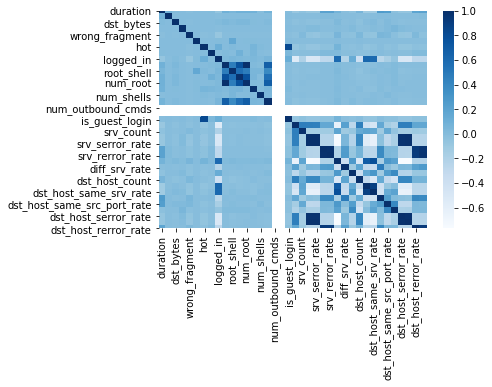

In [9]:
sns.heatmap(train.corr(),cmap="Blues")